In [1]:
data = []
with open("standard_rating_list.txt", "r") as file:
    lines = file.readlines()
    for row in lines:
        line = [row[0:15],row[15:76],row[76:80],row[80:84],row[84:89],row[89:94],row[94:109],row[109:113],row[113:119],row[119:123],row[123:126],row[126:132],row[132:]]
        stripped = [x.strip() for x in line]
        data.append(stripped)

In [2]:
import pandas as pd
df = pd.DataFrame(data[1:],columns=data[0])
df = df.astype({"ID Number": int, "MAR22": int, "K": int, "B-day": int})

avg rating all:  1645
avg rating all active:  1652
avg rating all active & K!=20:  1838


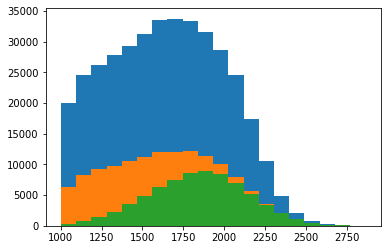

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_active = df[(df.Flag != "i") & (df.Flag != "wi")]
df_active_k20 = df[(df.Flag != "i") & (df.Flag != "wi") & (df.K != 40)]

plt.hist(df.MAR22, bins=20)
plt.hist(df_active.MAR22, bins=20)
plt.hist(df_active_k20.MAR22, bins=20)

print("avg rating all: ", round(np.mean(df.MAR22)))
print("avg rating all active: ", round(np.mean(df_active.MAR22)))
print("avg rating all active & K!=20: ", round(np.mean(df_active_k20.MAR22)))

'''
K is the development coefficient.
K = 40 for a player new to the rating list until he has completed events with at least 30 games
K = 40 for all players until their 18th birthday, as long as their rating remains under 2300.
K = 20 as long as a player's rating remains under 2400.
K = 10 once a player's published rating has reached 2400 and remains at that level subsequently, even if the rating drops below 2400.
'''


In [37]:
top_young_players = df[(df["B-day"] > 2004) & (df.MAR22 >= 2300)]
top_young_players.sort_values('MAR22', ascending=False)

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,MAR22,Gms,K,B-day,Flag
268616,25059530,Praggnanandhaa R,IND,M,GM,,,,2619,12,10,2005,
293560,35093487,"Sadhwani, Raunak",IND,M,GM,,,,2616,0,10,2005,
125199,46616543,Gukesh D,IND,M,GM,,,,2614,0,10,2006,
317935,14205483,"Sindarov, Javokhir",UZB,M,GM,,,,2609,0,10,2005,
72949,240990,"Dardha, Daniel",BEL,M,GM,,,,2540,23,10,2005,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247471,13423533,"Orujov, Farid",AZE,M,CM,,,,2302,3,20,2008,
24353,45010943,Ayush Sharma,IND,M,FM,,,,2302,0,20,2005,
82797,35006916,Divya Deshmukh,IND,F,WGM,WGM,,,2301,0,10,2005,w
369860,30953499,"Woodward, Andy",USA,M,FM,,,,2301,9,20,2010,


In [40]:
young_active = df[(df.Flag != "i") & (df.Flag != "wi") & (df["B-day"] > 2004)]
young_active

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,MAR22,Gms,K,B-day,Flag
50,25974068,Aadhya Jain,IND,F,,,,,1128,0,40,2011,w
53,25128728,Aadinath Harilal,IND,M,,,,AFM,1445,0,40,2010,
55,10242848,"Aadipto, Barua",BAN,M,,,,,1310,5,40,2007,
57,25918257,Aadish Shah,IND,M,,,,,1174,0,40,2010,
63,25656180,Aadithya Pradeep,IND,M,,,,,1483,0,40,2005,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380751,45196001,"Zylbersztejn-Donato, Arthur",FRA,M,,,,,1286,0,40,2010,
380762,54196701,"Zyrianov, Viacheslav",RUS,M,,,,,1399,0,40,2006,
380767,34478060,"Zyryanov, Igor An",RUS,M,,,,,1208,0,40,2011,
380768,44160267,"Zyryanov, Konstantin",RUS,M,,,,,1641,0,40,2005,


(array([ 738., 1102., 1500., 1881., 2197., 2470., 2675., 2791., 2666.,
        2617., 2248., 1992., 1684., 1271.,  947.,  608.,  351.,  181.,
          98.,   41.]),
 array([1001.  , 1065.85, 1130.7 , 1195.55, 1260.4 , 1325.25, 1390.1 ,
        1454.95, 1519.8 , 1584.65, 1649.5 , 1714.35, 1779.2 , 1844.05,
        1908.9 , 1973.75, 2038.6 , 2103.45, 2168.3 , 2233.15, 2298.  ]),
 <BarContainer object of 20 artists>)

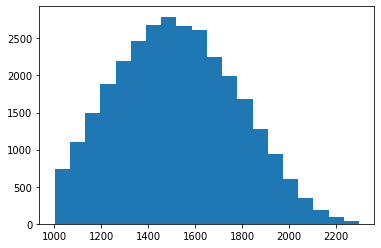

In [45]:
df[(df.K == 40) & (df["B-day"] < 2005) & (df.Flag != "i") & (df.Flag != "wi")]

plt.hist(df[(df.K == 40) & (df["B-day"] < 2005) & (df.Flag != "i") & (df.Flag != "wi")].MAR22, bins=20)

In [48]:
df[df["B-day"] == 2016]

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,MAR22,Gms,K,B-day,Flag
46610,9211505,"Brajic, Andrej",SRB,M,,,,,1307,0,40,2016,
270899,651088894,"Protopopescu, Luca",FRA,M,,,,,1258,1,40,2016,
